In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Get data directly from github (CSV File with three columns (Cl, Cd, Volume))
url='https://raw.githubusercontent.com/gabachour44/cs7641-group7/main/clustering_traindata.csv?token=ATI4TDPAMXAYITIU7YJAGATBA555A'
data=pd.read_csv(url)

In [ ]:
traindata=pd.DataFrame.to_numpy(data)
print(traindata[:10,:])

[[0.0973     0.00613    0.05350586]
 [0.2376     0.00826    0.03143805]
 [0.2922     0.00879    0.03924112]
 [0.2996     0.00784    0.06335851]
 [0.6481     0.00843    0.06076923]
 [1.0213     0.01223    0.06835583]
 [0.2876     0.00927    0.09380763]
 [0.4765     0.00956    0.09318045]
 [0.1567     0.01749    0.11515864]
 [0.366      0.01036    0.10113165]]


In [ ]:
#Data cleaning: removing rows with zeros
#print(np.shape(traindata))
#zero_ind=np.where(traindata[:,0]!=0)[0]
#traindata=traindata[zero_ind,:]
#print(np.shape(traindata))

In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn import preprocessing

In [ ]:
#Number of components for GMM Model
num_comp=6
#Scaling
scaler=preprocessing.StandardScaler().fit(traindata)
scaledata=scaler.transform(traindata)
#Train GMM
gmm=GaussianMixture(n_components=num_comp).fit(scaledata)
#Get cluster labels for data
labels=gmm.predict(scaledata)
print(labels[:10])

#Probability of each point belonging in any of the clusters
labels_prob=gmm.predict_proba(scaledata)
print(labels_prob[:10,:])

[5 1 1 5 4 1 5 4 2 4]
[[2.30977960e-009 6.44378974e-007 3.57748252e-002 2.43010920e-019
  7.28254578e-006 9.64217246e-001]
 [8.60868788e-005 8.97081364e-001 1.02832549e-001 7.01521491e-026
  1.00847557e-029 9.40467889e-020]
 [4.94288029e-004 9.91671932e-001 7.83378009e-003 3.06373569e-021
  1.08220209e-025 1.15013945e-019]
 [1.94318979e-005 3.52274639e-003 1.16063818e-004 1.16186166e-011
  1.94404378e-003 9.94397714e-001]
 [8.89819608e-005 6.27151832e-002 2.96218773e-017 3.32891718e-005
  9.35514409e-001 1.64813623e-003]
 [1.04359519e-002 6.61418157e-001 3.74159012e-039 3.28145892e-001
  1.78096704e-012 3.69942389e-040]
 [5.48192415e-004 6.74594299e-004 1.34645681e-005 2.95553320e-006
  2.68167375e-001 7.30593418e-001]
 [1.76580156e-003 3.50939092e-003 1.15427171e-011 3.31657412e-004
  8.15734516e-001 1.78658634e-001]
 [1.48081367e-005 4.94564454e-029 9.99977320e-001 7.87158924e-006
  5.38117399e-078 6.69471410e-104]
 [1.39853785e-002 5.59080161e-003 2.33056358e-007 2.85938343e-004
  9

Text(0, 0.5, 'Volume')

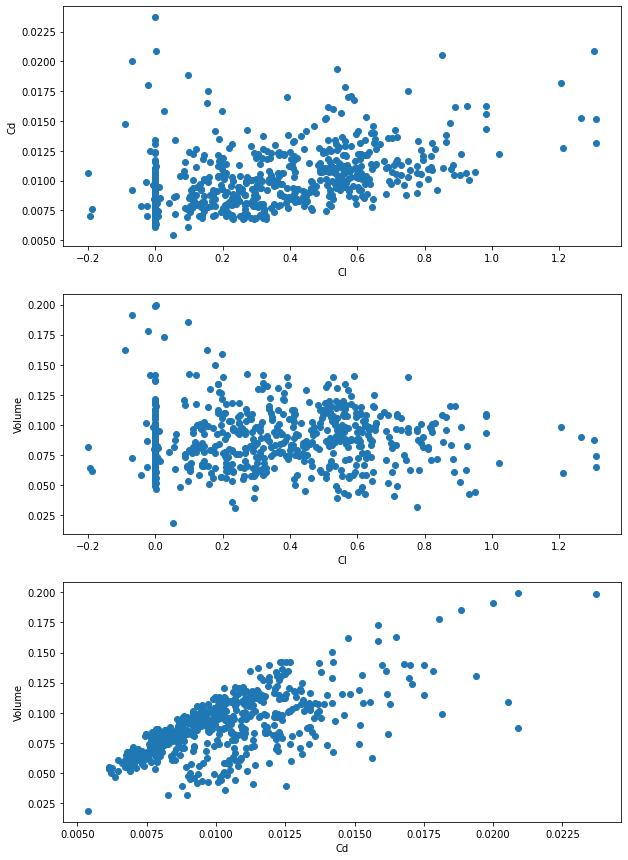

In [ ]:
#Visualize data using three 2D plots
fig, axs = plt.subplots(3, figsize=(10,15))

axs[0].scatter(traindata[:,0], traindata[:,1])
axs[1].scatter(traindata[:,0], traindata[:,2])
axs[2].scatter(traindata[:,1], traindata[:,2])

axs[0].set_xlabel("Cl")
axs[0].set_ylabel("Cd")
axs[1].set_xlabel("Cl")
axs[1].set_ylabel("Volume")
axs[2].set_xlabel("Cd")
axs[2].set_ylabel("Volume")
  

Text(0, 0.5, 'Volume')

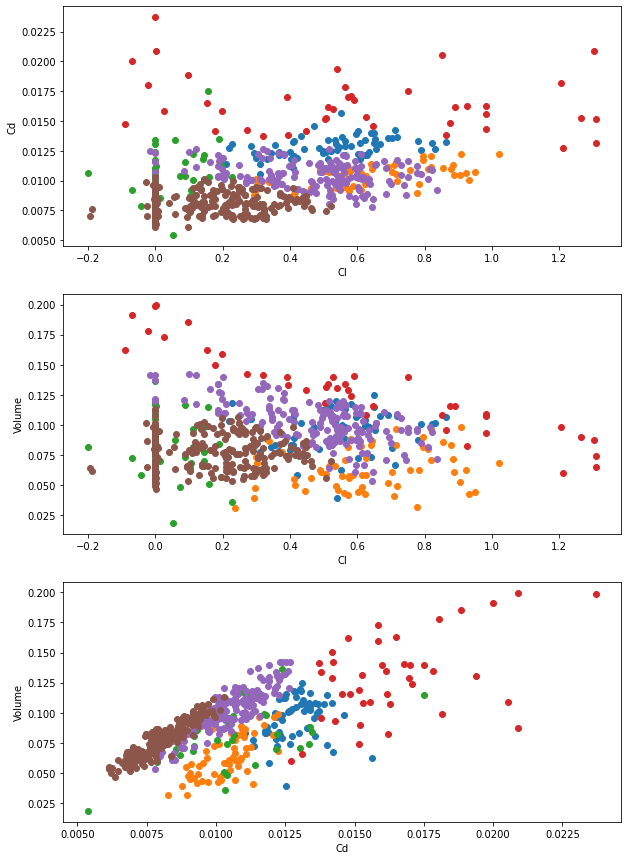

In [ ]:
#Visualize labelled data using three 2D plots
fig, axs = plt.subplots(3, figsize=(10,15))
for i in range (0,num_comp):
  axs[0].scatter(traindata[labels==i,0], traindata[labels==i,1])
  axs[1].scatter(traindata[labels==i,0], traindata[labels==i,2])
  axs[2].scatter(traindata[labels==i,1], traindata[labels==i,2])

axs[0].set_xlabel("Cl")
axs[0].set_ylabel("Cd")
axs[1].set_xlabel("Cl")
axs[1].set_ylabel("Volume")
axs[2].set_xlabel("Cd")
axs[2].set_ylabel("Volume")
  

Text(0.5, 0, 'Volume')

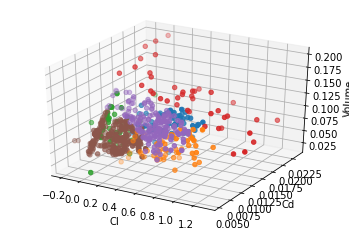

In [ ]:
#Visualize labelled data in a single 3D plot
ax = plt.axes(projection='3d')
for i in range(0, num_comp):
  ax.scatter3D(traindata[labels==i,0], traindata[labels==i,1], traindata[labels==i,2])

ax.set_xlabel("Cl")
ax.set_ylabel("Cd")
ax.set_zlabel("Volume")


Text(0, 0.5, 'Davies-Bouldin Score')

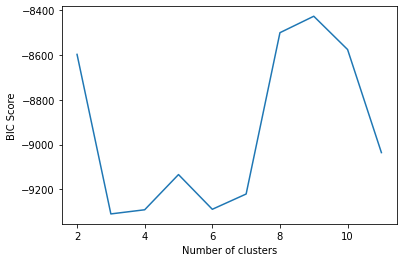

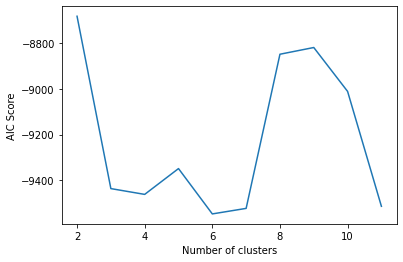

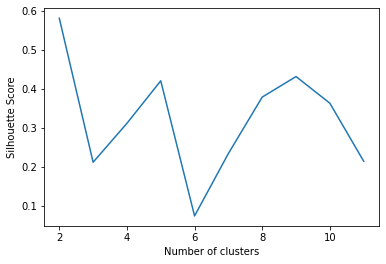

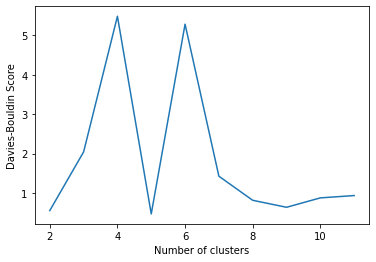

In [ ]:
#Compute goodness scores for GMM models with number of components varying from 2 to 12
bic=np.zeros((10,))
aic=np.zeros((10,))
sil=np.zeros((10,))
comp=np.linspace(2,11,10)
dbi=np.zeros((10,))
for i in range(2,12):
  try_gmm=GaussianMixture(n_components=i).fit(traindata)
  bic[i-2]=(try_gmm.bic(traindata)) #Bayesian Information Criterion metric for GMM evaluation- the lower the better
  aic[i-2]=(try_gmm.aic(traindata)) #Akaike Information Criterion metric for GMM evaluation- the lower the better
  pred=try_gmm.predict(traindata)   
  sil[i-2]=silhouette_score(traindata, pred) #Silhouette coefficient- the closer to 1, the better
  dbi[i-2]=davies_bouldin_score(traindata, pred) #Davies-Bouldin Index- the lower the better

plt.figure()
plt.plot(comp,bic)
plt.xlabel('Number of clusters')
plt.ylabel('BIC Score')
plt.figure()
plt.plot(comp,aic)
plt.xlabel('Number of clusters')
plt.ylabel('AIC Score')
plt.figure()
plt.plot(comp, sil)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.figure()
plt.plot(comp, dbi)
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Get data directly from github (CSV File with three columns (Cl, Cd, Volume))
url='https://raw.githubusercontent.com/gabachour44/cs7641-group7/main/clustering_traindata.csv?token=ATI4TDPAMXAYITIU7YJAGATBA555A'
data=pd.read_csv(url)

In [ ]:
traindata=pd.DataFrame.to_numpy(data)
print(traindata[:10,:])

[[0.0973     0.00613    0.05350586]
 [0.2376     0.00826    0.03143805]
 [0.2922     0.00879    0.03924112]
 [0.2996     0.00784    0.06335851]
 [0.6481     0.00843    0.06076923]
 [1.0213     0.01223    0.06835583]
 [0.2876     0.00927    0.09380763]
 [0.4765     0.00956    0.09318045]
 [0.1567     0.01749    0.11515864]
 [0.366      0.01036    0.10113165]]


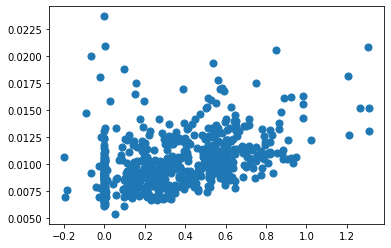

In [ ]:
plt.scatter(traindata[:, 0], traindata[:, 1], s=50)

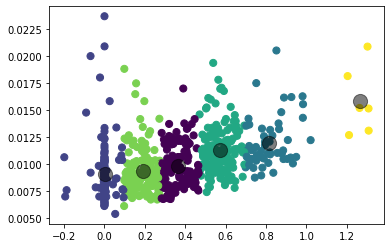

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(traindata)
y_kmeans = kmeans.predict(traindata)
plt.scatter(traindata[:, 0], traindata[:, 1], c=y_kmeans, s=50, cmap='viridis')
labels = kmeans.labels_
#print(labels[:10])
centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Text(0, 0.5, 'Volume')

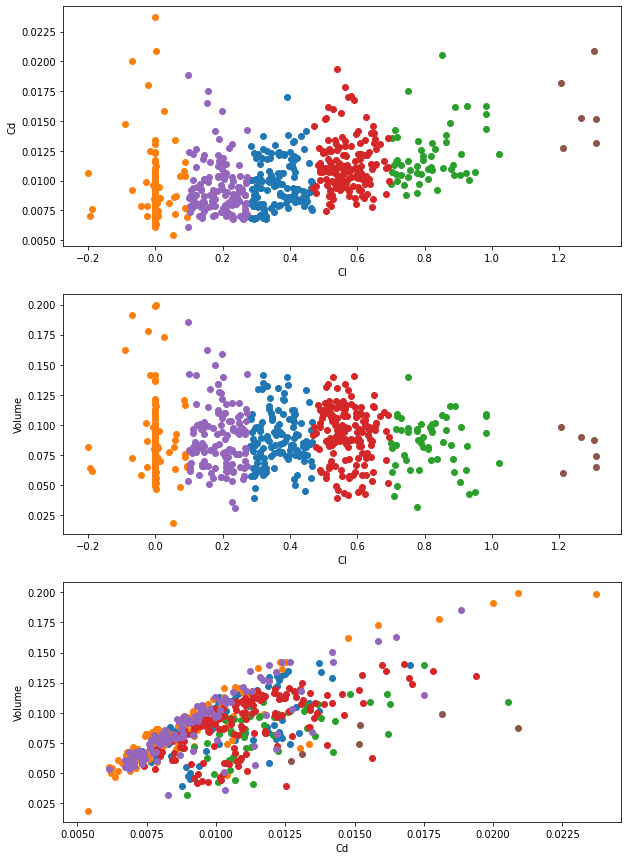

In [ ]:
#Visualize labelled data using three 2D plots
fig, axs = plt.subplots(3, figsize=(10,15))
n_clusters = 6
for i in range (0,n_clusters):
  axs[0].scatter(traindata[labels==i,0], traindata[labels==i,1])
  axs[1].scatter(traindata[labels==i,0], traindata[labels==i,2])
  axs[2].scatter(traindata[labels==i,1], traindata[labels==i,2])

axs[0].set_xlabel("Cl")
axs[0].set_ylabel("Cd")
axs[1].set_xlabel("Cl")
axs[1].set_ylabel("Volume")
axs[2].set_xlabel("Cd")
axs[2].set_ylabel("Volume")
  

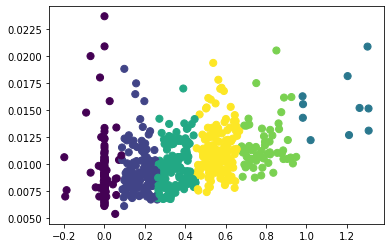

In [ ]:
#Expectation Maximization Approach
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(traindata, n_clusters, rseed=2):
    # Choose clusters randomly 
    rng = np.random.RandomState(rseed)
    i = rng.permutation(traindata.shape[0])[:n_clusters]
    centers = traindata[i]
    
    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(traindata, centers)
        
        # Then, determine new centers using means of points
        new_centers = np.array([traindata[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # Finally, check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(traindata, 6)
plt.scatter(traindata[:, 0], traindata[:, 1], c=labels,
            s=50, cmap='viridis');

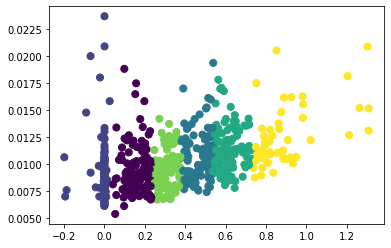

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=6, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(traindata)
plt.scatter(traindata[:, 0], traindata[:, 1], c=labels,
            s=50, cmap='viridis');
#print(labels)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# the comments are set to '' to avoid hash marks on the first line.
np.savetxt('Label_output.csv',labels,delimiter=',',fmt='%s',header='Label',comments='')
files.download('Label_output.csv')

NameError: ignored

Text(0.5, 0, 'Volume')

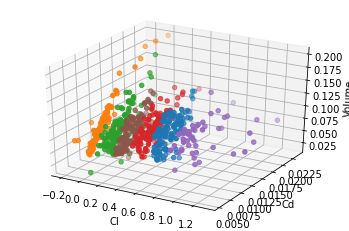

In [ ]:
#Single 3D plot to visualize labelled data
ax = plt.axes(projection='3d')
for i in range(0, n_clusters):
  ax.scatter3D(traindata[labels==i,0], traindata[labels==i,1], traindata[labels==i,2])

ax.set_xlabel("Cl")
ax.set_ylabel("Cd")
ax.set_zlabel("Volume")


# Deep learning classification

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from keras.callbacks import TensorBoard
from time import time



# Import data
df = pd.read_csv('/content/drive/MyDrive/ML_SUMMER21/dataset.csv', header = None)
################################ TEMPORARY######################################
#raw_X = np.random.rand(10000,9) #9 PARSEC PARAMETERS
#raw_Y = np.random.randint(6, size=(10000, 1)) # 6 classes
#df = np.concatenate([raw_X, raw_Y], axis=1) 
#df = pd.DataFrame(df)
################################################################################


print(df.info())  # Descriptive info about the DataFrame
print(df.shape)



# Split data and label
X = df.loc[:,0:8]
Y = df.loc[:,9]
print(X.shape)
print(Y.shape)

# Normalize features within range 0 (minimum) and 1 (maximum)
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

# 1-hot encoding
Y = pd.get_dummies(Y)

# Keras formating 
X = X.values
Y = Y.values

# Code for shuffling input
#X,Y = shuffle(X,Y)

# Model architecture
model = Sequential()
model.add(Dense(22, input_dim = 9, activation = 'tanh')) # 9 features
model.add(Dense(44, activation = 'relu'))
model.add(Dense(88, activation = 'relu'))
model.add(Dense(44, activation = 'relu'))
model.add(Dense(22, activation = 'relu'))
model.add(Dense(6, activation = 'softmax')) # 6 classes to predict

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    

# Train the model
tensorboard = TensorBoard(log_dir='/content/drive/MyDrive/ML_SUMMER21/logs/{}'.format(time()))

#Train the model using tensorboard instance in the callbacks
history=model.fit(X, Y,
         epochs=2000,
         callbacks=[tensorboard])

# batch gradient descent with validation set of 10%
#model.fit(X,Y,batch_size=200,epochs=1000,validation_split=0.1)

model.save('/content/drive/MyDrive/ML_SUMMER21/') # change path to save the model


#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       600 non-null    float64
 1   1       600 non-null    float64
 2   2       600 non-null    float64
 3   3       600 non-null    float64
 4   4       600 non-null    float64
 5   5       600 non-null    float64
 6   6       600 non-null    float64
 7   7       600 non-null    float64
 8   8       600 non-null    float64
 9   9       600 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 47.0 KB
None
(600, 10)
(600, 9)
(600,)
Epoch 1/2000
19/19 [==============================] - 1s 8ms/step - loss: 1.7682 - accuracy: 0.2530
Epoch 2/2000
19/19 [==============================] - 0s 2ms/step - loss: 1.7216 - accuracy: 0.3020
Epoch 3/2000
19/19 [==============================] - 0s 2ms/step - loss: 1.6900 - accuracy: 0.2966
Epoch 4/2000
19/19 [==============================] - 0s 2ms/step - l

In [ ]:


%load_ext tensorboard.notebook

%tensorboard — logdir /content/drive/MyDrive/ML_SUMMER21/logs/

The tensorboard.notebook extension is already loaded. To reload it, use:
  %reload_ext tensorboard.notebook


Launching TensorBoard...

FileNotFoundError: ignored

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       600 non-null    float64
 1   1       600 non-null    float64
 2   2       600 non-null    float64
 3   3       600 non-null    float64
 4   4       600 non-null    float64
 5   5       600 non-null    float64
 6   6       600 non-null    float64
 7   7       600 non-null    float64
 8   8       600 non-null    float64
 9   9       600 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 47.0 KB
None
(600, 10)
(600, 9)
(600, 6)
Epoch 1/1000
4/4 - 15s - loss: 1.7948 - categorical_accuracy: 0.1733 - val_loss: 1.7856 - val_categorical_accuracy: 0.2400
Epoch 2/1000
4/4 - 0s - loss: 1.7760 - categorical_accuracy: 0.1911 - val_loss: 1.7761 - val_categorical_accuracy: 0.2200
Epoch 3/1000
4/4 - 0s - loss: 1.7669 - categorical_accuracy: 0.1733 - val_loss: 1.7669 - val_categorical_accuracy: 0.2000


Text(0, 0.5, 'Accuracy')

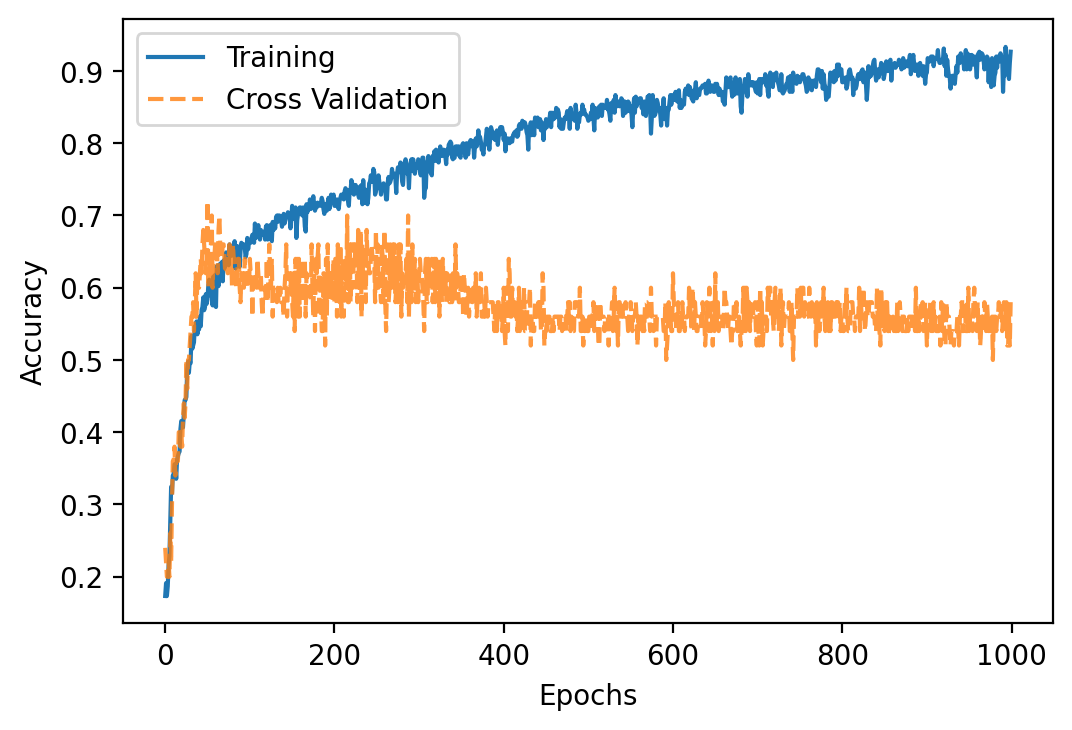

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from keras.callbacks import TensorBoard
from sklearn.utils import shuffle
from time import time
from tensorflow import keras
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt


# Import data
url = 'https://raw.githubusercontent.com/gabachour44/cs7641-group7/main/dataset.csv?token=AQ3V7G7BXKCKHPDFRRZZRI3BBXNIM'

df = pd.read_csv(url, header = None)
################################ TEMPORARY######################################
#raw_X = np.random.rand(10000,9) #9 PARSEC PARAMETERS
#raw_Y = np.random.randint(6, size=(10000, 1)) # 6 classes
#df = np.concatenate([raw_X, raw_Y], axis=1) 
#df = pd.DataFrame(df)
################################################################################


print(df.info())  # Descriptive info about the DataFrame
print(df.shape)



# Split data and label
X = df.loc[:,0:8]
Y = df.loc[:,9]
#print(X.shape)
#print(Y.shape)

# Normalize features within range 0 (minimum) and 1 (maximum)
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

# 1-hot encoding
Y = pd.get_dummies(Y)

# Keras formating 
X = X.values
Y = Y.values
#print(Y)
print(X.shape)
print(Y.shape)

# Code for shuffling input
X,Y = shuffle(X,Y)
X_train=X[:500,:]
Y_train=Y[:500,:]

X_test=X[500:,:]
Y_test=Y[500:,:]



# Model architecture
'''
model_2 = Sequential()
model_2.add(Dense(22, input_dim = 9, activation = 'tanh')) # 9 features
model_2.add(Dense(44, activation = 'relu'))
model_2.add(Dense(66, activation = 'relu'))
model_2.add(Dense(44, activation = 'relu'))
model_2.add(Dense(22, activation = 'relu'))
model_2.add(Dense(6, activation = 'softmax'))
'''
reg = 1.75e-3


model_2 = Sequential()
model_2.add(Dense(12, input_dim = 9, activation = 'tanh',kernel_regularizer=regularizers.l2(l2=reg))) # 9 features
model_2.add(Dense(12, activation = 'tanh',kernel_regularizer=regularizers.l2(l2=reg)))
model_2.add(Dense(18, activation = 'tanh',kernel_regularizer=regularizers.l2(l2=reg)))
model_2.add(Dense(24, activation = 'tanh',kernel_regularizer=regularizers.l2(l2=reg)))
model_2.add(Dense(24, activation = 'tanh',kernel_regularizer=regularizers.l2(l2=reg)))
model_2.add(Dense(18, activation = 'tanh',kernel_regularizer=regularizers.l2(l2=reg)))
model_2.add(Dense(6, activation = 'softmax'))


opt = keras.optimizers.Adam(learning_rate=0.001)
model_2.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['CategoricalAccuracy'])

# batch gradient descent with validation set of 10%
history = model_2.fit(X_train,Y_train,batch_size=125,epochs=1000,validation_split=0.1,shuffle=True,
                      verbose=2)

#model.save('/content/drive/MyDrive/ML_SUMMER21/') # change path to save the model


#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#print(history.history.keys())
score = model_2.evaluate(X_test,Y_test)
print(score)

plt.figure(dpi= 200)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'],'--',alpha=0.8)
plt.legend(['Training','Cross Validation'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       600 non-null    float64
 1   1       600 non-null    float64
 2   2       600 non-null    float64
 3   3       600 non-null    float64
 4   4       600 non-null    float64
 5   5       600 non-null    float64
 6   6       600 non-null    float64
 7   7       600 non-null    float64
 8   8       600 non-null    float64
 9   9       600 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 47.0 KB
None
(600, 10)
(600, 9)
(600, 6)
Epoch 1/1000
4/4 - 1s - loss: 2.0314 - categorical_accuracy: 0.0889 - val_loss: 2.0086 - val_categorical_accuracy: 0.1200
Epoch 2/1000
4/4 - 0s - loss: 2.0237 - categorical_accuracy: 0.1022 - val_loss: 2.0039 - val_categorical_accuracy: 0.1200
Epoch 3/1000
4/4 - 0s - loss: 2.0173 - categorical_accuracy: 0.1022 - val_loss: 1.9996 - val_categorical_accuracy: 0.1200
E

Text(0, 0.5, 'Accuracy')

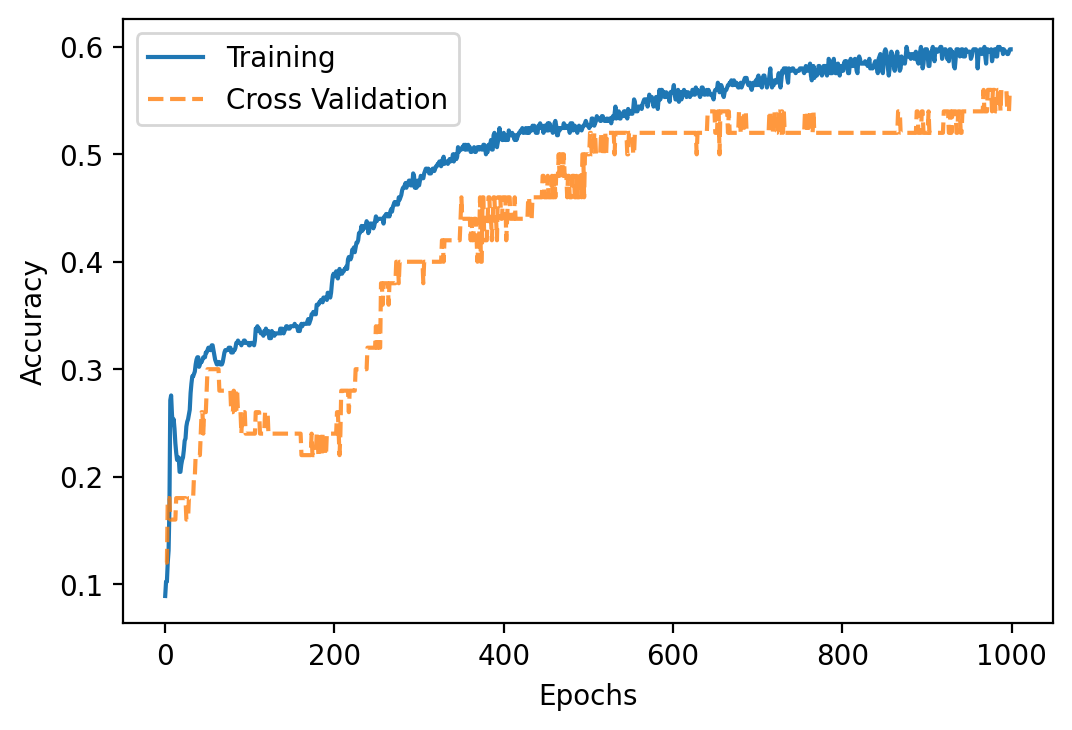

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from keras.callbacks import TensorBoard
from sklearn.utils import shuffle
from time import time
from tensorflow import keras
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt


# Import data
url = 'https://raw.githubusercontent.com/gabachour44/cs7641-group7/main/dataset.csv?token=AQ3V7G7BXKCKHPDFRRZZRI3BBXNIM'

df = pd.read_csv(url, header = None)
################################ TEMPORARY######################################
#raw_X = np.random.rand(10000,9) #9 PARSEC PARAMETERS
#raw_Y = np.random.randint(6, size=(10000, 1)) # 6 classes
#df = np.concatenate([raw_X, raw_Y], axis=1) 
#df = pd.DataFrame(df)
################################################################################


print(df.info())  # Descriptive info about the DataFrame
print(df.shape)



# Split data and label
X = df.loc[:,0:8]
Y = df.loc[:,9]
#print(X.shape)
#print(Y.shape)

# Normalize features within range 0 (minimum) and 1 (maximum)
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

# 1-hot encoding
Y = pd.get_dummies(Y)

# Keras formating 
X = X.values
Y = Y.values
#print(Y)
print(X.shape)
print(Y.shape)

# Code for shuffling input
X,Y = shuffle(X,Y)
X_train=X[:500,:]
Y_train=Y[:500,:]

X_test=X[500:,:]
Y_test=Y[500:,:]



# Model architecture
'''
model_2 = Sequential()
model_2.add(Dense(22, input_dim = 9, activation = 'tanh')) # 9 features
model_2.add(Dense(44, activation = 'relu'))
model_2.add(Dense(66, activation = 'relu'))
model_2.add(Dense(44, activation = 'relu'))
model_2.add(Dense(22, activation = 'relu'))
model_2.add(Dense(6, activation = 'softmax'))
'''
reg = 1.75e-3


model_2 = Sequential()
model_2.add(Dense(12, input_dim = 9, activation = 'tanh',kernel_regularizer=regularizers.l2(l2=reg))) # 9 features
model_2.add(Dense(12, activation = 'tanh',kernel_regularizer=regularizers.l2(l2=reg)))
model_2.add(Dense(18, activation = 'tanh',kernel_regularizer=regularizers.l2(l2=reg)))
model_2.add(Dense(24, activation = 'tanh',kernel_regularizer=regularizers.l2(l2=reg)))
model_2.add(Dense(24, activation = 'tanh',kernel_regularizer=regularizers.l2(l2=reg)))
model_2.add(Dense(18, activation = 'tanh',kernel_regularizer=regularizers.l2(l2=reg)))
model_2.add(Dense(6, activation = 'softmax'))


opt = keras.optimizers.Adam(learning_rate=0.0001)
model_2.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['CategoricalAccuracy'])

# batch gradient descent with validation set of 10%
history = model_2.fit(X_train,Y_train,batch_size=125,epochs=1000,validation_split=0.1,shuffle=True,
                      verbose=2)

#model.save('/content/drive/MyDrive/ML_SUMMER21/') # change path to save the model


#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#print(history.history.keys())
score = model_2.evaluate(X_test,Y_test)
print(score)

plt.figure(dpi= 200)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'],'--',alpha=0.8)
plt.legend(['Training','Cross Validation'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
